## Trabalho: Definição de Dataset, Limpeza e Análise dos Dados
##### 1. Escolha um dataset

Escolha um dataset a partir do Portal de Dados Abertos da Prefeitura de Curitiba (https://www.curitiba.pr.gov.br/DADOSABERTOS/). Este dataset será usado em todos os trabalhos da disciplina. Portanto, escolha um dataset que pareça ser interessante.

##### 2. Limpeza de dados

Faça os procedimentos de limpeza de dados

##### 3. Análise exploratória

análise exploratória no dataset escolhido usando o Jupyter Notebook. Se for necessário, reduza o tamanho ou simplifique o dataset.

##### 4. Relatório

Escreva um relatório inicial contendo as seções:

* Descrição do dataset (descreva o objetivo do dataset e os dados contidos nele como colunas, cobertura de dados, etc.)
* Procedimentos de Limpeza (descreva como os dados foram limpos, o que foi retirado e quantos dados sobraram no final)
* Análise Exploratória (apresente os gráficos e análises estatísticas elaborados; para cada elemento incluído, descreva quais padrões podem ser observados e sugira hipóteses para explicá-los)
* Perguntas iniciais (descreva as perguntas que você pretende responder nas análises sobre os dados. estas perguntas podem ser alteradas nas próximas etapas).

##### 5. Submissão

Submeta abaixo:

* um documento PDF contendo o relatório 
* documentos HTML baixados do Jupiter Notebook com os comandos usados para de limpeza e análise dos dados.

Obs: se estiver fazendo o trabalho em dupla, apenas uma pessoa deve enviar

------------------------

## 1. Escolha um dataset

O dataset escolhido foi o que contém informações sobre Licitações e Contratações da prefeitura de Curitiba



#### Descrição do Dataset
Relatório contendo as informações sobre as compras e contratações, com o detalhamento dos gastos públicos.

* Órgão responsável: Administração e Gestão de Pessoal
* Responsável:
    * Contratações: [Patricia Mendes Maurer][7] (Departamento de Gestão de Serviços)
    * Licitações: [Fabíola Roberti Coneglian][7] (Departamento de Licitação e Gestão de Compras)
* Frequência de atualização: Mensal
* Espectro temporal: Últimos 5 anos
* Campos: [Ver no dicionário de dados]
* Ultima atualização: 01/04/2021 09:12
* Dataset encoding: ANSI "ISO-8859-1"
* Separador de coluna: ';'
* Separador decimal: ','

#### Objetivo:
Objetivo deste trabalho é analisar o dataset de modo a pontuar quais foram as principais mudanças de comportamento devido à pandemia.
##### Perguntas Iniciais
* Houve mudança no compartamento dos dados durante a pandemia?

#### Referências

[Licitacoes Contratacoes Dados Basicos - Dicionario de Dados (Atualizado em 01/04/2021)][4] \
[Licitacoes Contratacoes Dados Basicos - Base de Dados (Atualizado em 01/04/2021)][1] \
(DETALHE) Informações básicas sobre as licitações / contratações

[Licitacoes Contratacoes Empenhos - Dicionario de Dados (Atualizado em 01/04/2021)][5] \
[Licitacoes Contratacoes Empenhos - Base de Dados (Atualizado em 01/04/2021)][2]\
(DETALHE) Dataset que traz os valores empenhados de cada licitação

[Licitacoes Contratacoes Itens Processo - Dicionario de Dados (Atualizado em 01/04/2021)][6] \
[Licitacoes Contratacoes Itens Processo - Base de Dados (Atualizado em 01/04/2021)][3]\
(DETALHE) Esta dataset lista todos os itens (artigos/produtos/serviços) e suas quantidades para cada Processo.
KEY: (Órgão, Numero do Processo)

[1]: https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Dados_Basicos_-_Base_de_Dados.csv
[2]: https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Empenhos_-_Base_de_Dados.csv
[3]: https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Itens_Processo_-_Base_de_Dados.csv
[4]: https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Dados_Basicos_-_Dicionario_de_Dados.csv
[5]: https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Empenhos_-_Dicionario_de_Dados.csv
[6]: https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Itens_Processo_-_Dicionario_de_Dados.csv
[7]: https://www.curitiba.pr.gov.br/conteudo/estrutura/67

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

### Aumentar o tamanho dos graficos
plt.rcParams["figure.figsize"] = (20,10)
### Não transformar numeros de ponto flutuante com a notação e+ em grids
pd.set_option('float_format', '{:f}'.format)

##### 1.2. Download dos dados

In [2]:
### Setar esta variavel para true quando nao for preciso baixar o arquivo
CACHE = False

if not CACHE:
    url = [
    "https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Dados_Basicos_-_Base_de_Dados.csv"
    ,"https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Empenhos_-_Base_de_Dados.csv"
    ,"https://mid.curitiba.pr.gov.br/dadosabertos/LicitacoesContratacoes/2021-04-01_Licitacoes_Contratacoes_Itens_Processo_-_Base_de_Dados.csv"
    ]

    df_dados_basicos  = pd.read_csv(url[0], encoding = "ISO-8859-1", delimiter=';')
    df_empenhos       = pd.read_csv(url[1], encoding = "ISO-8859-1", delimiter=';')
    df_itens_processo = pd.read_csv(url[2], encoding = "ISO-8859-1", delimiter=';')


In [3]:
############# CACHE REMOVER #############
df_dados_basicos_cache = df_dados_basicos.copy()
df_empenhos_cache = df_empenhos.copy()
df_itens_processo_cache = df_itens_processo.copy()

In [4]:
############# RESTART DATASET SEM DOWNLOAD #############
df_dados_basicos = df_dados_basicos_cache.copy()
df_empenhos = df_empenhos_cache.copy()
df_itens_processo = df_itens_processo_cache.copy()

##### 2. Limpeza de Dados
A limpeza dos dados é feita da seguinte forma:

2.1 Remoção de registros com valores NaN (quanto aplicável)\
2.2 Remoção de registros com valores com valor inválido\
2.3 Conversão dos tipos das colunas\
2.4 Junção dos datasets\
2.5 Seleção das colunas que serão utilizadas\
2.6 Conversão de valores\
2.7 Remoção dos outliers\
2.8 Salvar arquivo limpo

#### 2.1 Remoção de registros com valores NaN

In [5]:
df_empenhos.isna().any() 

Órgão                    False
Número do Processo       False
Modalidade               False
Número do Contrato        True
Número do Empenho        False
Contratado/Fornecedor    False
CNPJ/CPF                 False
Valor Empenhado          False
Valor Liquidado          False
Valor Anulado            False
Valor Pago               False
Valor a Pagar            False
Fonte de Recursos        False
dtype: bool

In [6]:
df_dados_basicos.isna().any() 

Órgão                             False
Número do Processo                False
Modalidade                        False
Objeto                            False
Valor Total/Global                 True
Local de Execução/Entrega          True
Data Diário Oficial               False
Protocolo                         False
Início da vigência do contrato     True
Fim da Vigência do Contrato        True
Situação                          False
dtype: bool

In [7]:
df_itens_processo.isna().any() 

Órgão                             False
Número do Processo                False
Modalidade                        False
Item                              False
Quantidade                        False
Unidade de Medida                 False
Contratato/Fornecedor             False
CNPJ/CPF                          False
Número do Contrato                 True
Inicio da Vigência do Contrato     True
Fim da Vigência do Contrato        True
Valor Unitário                    False
Valor Total/Global                False
dtype: bool

In [8]:
i_df_total = len(df_empenhos.index)
i_isnan_size = len(df_empenhos[df_empenhos['Número do Contrato'].isna()].index)

print("Aproximadamente {} registros não possuem o Número de Contrato. Total de registros neste dataset: {}. ".format(i_isnan_size, i_df_total))

Aproximadamente 14747 registros não possuem o Número de Contrato. Total de registros neste dataset: 27610. 


Como a quantidade de contratos sem numero é significativa, não irei remover estes registros

#### 2.2 Remoção de registros com valores inválido

Alguns registros possuiam caracteres de identificação da moeda. Estes caracteres foram removidos na seção seguinte.

#### 2.3 Conversão dos tipos das colunas

In [9]:
#Criação de uma coluna para facilitar a junção dos datasets
df_empenhos['COD'] = df_empenhos['Órgão'].str.cat(df_empenhos['Número do Processo'])
df_dados_basicos['COD'] = df_dados_basicos['Órgão'].str.cat(df_dados_basicos['Número do Processo'])
df_itens_processo['COD'] = df_itens_processo['Órgão'].str.cat(df_itens_processo['Número do Processo'])
df_empenhos['COD'] = df_empenhos['COD'].str.replace(' ', '')
df_dados_basicos['COD'] = df_dados_basicos['COD'].str.replace(' ', '')
df_itens_processo['COD'] = df_itens_processo['COD'].str.replace(' ', '')

In [10]:
#Converter os campos inteiros
df_empenhos["Número do Contrato"] = df_empenhos["Número do Contrato"].astype(pd.Int32Dtype())
df_itens_processo["Número do Contrato"] = df_itens_processo["Número do Contrato"].astype(pd.Int32Dtype())

In [11]:
#Converter os campos decimais
df_dados_basicos["Valor Total/Global"] = df_dados_basicos["Valor Total/Global"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
df_empenhos["Valor Empenhado"] = df_empenhos["Valor Empenhado"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
df_empenhos["Valor Liquidado"] = df_empenhos["Valor Liquidado"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
df_empenhos["Valor Anulado"] = df_empenhos["Valor Anulado"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
df_empenhos["Valor Pago"] = df_empenhos["Valor Pago"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
df_empenhos["Valor a Pagar"] = df_empenhos["Valor a Pagar"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
df_itens_processo["Valor Unitário"] = df_itens_processo["Valor Unitário"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)
df_itens_processo["Valor Total/Global"] = df_itens_processo["Valor Total/Global"].str.replace('R', '').str.replace('$', '').str.replace('.', '').str.replace(',', '.').str.strip().astype(float)

In [12]:
#Converter os campos datetime
df_dados_basicos["Data Diário Oficial"] = pd.to_datetime(df_dados_basicos["Data Diário Oficial"])
df_dados_basicos["Início da vigência do contrato"] = pd.to_datetime(df_dados_basicos["Início da vigência do contrato"])
df_dados_basicos["Fim da Vigência do Contrato"] = pd.to_datetime(df_dados_basicos["Fim da Vigência do Contrato"])
df_itens_processo["Inicio da Vigência do Contrato"] = pd.to_datetime(df_itens_processo["Inicio da Vigência do Contrato"])
df_itens_processo["Fim da Vigência do Contrato"] = pd.to_datetime(df_itens_processo["Fim da Vigência do Contrato"])

In [13]:
df_dados_basicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9947 entries, 0 to 9946
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Órgão                           9947 non-null   object        
 1   Número do Processo              9947 non-null   object        
 2   Modalidade                      9947 non-null   object        
 3   Objeto                          9947 non-null   object        
 4   Valor Total/Global              8971 non-null   float64       
 5   Local de Execução/Entrega       9895 non-null   object        
 6   Data Diário Oficial             9947 non-null   datetime64[ns]
 7   Protocolo                       9947 non-null   object        
 8   Início da vigência do contrato  8184 non-null   datetime64[ns]
 9   Fim da Vigência do Contrato     8160 non-null   datetime64[ns]
 10  Situação                        9947 non-null   object        
 11  COD 

In [14]:
df_empenhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27610 entries, 0 to 27609
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Órgão                  27610 non-null  object 
 1   Número do Processo     27610 non-null  object 
 2   Modalidade             27610 non-null  object 
 3   Número do Contrato     12863 non-null  Int32  
 4   Número do Empenho      27610 non-null  int64  
 5   Contratado/Fornecedor  27610 non-null  object 
 6   CNPJ/CPF               27610 non-null  object 
 7   Valor Empenhado        27610 non-null  float64
 8   Valor Liquidado        27610 non-null  float64
 9   Valor Anulado          27610 non-null  float64
 10  Valor Pago             27610 non-null  float64
 11  Valor a Pagar          27610 non-null  float64
 12  Fonte de Recursos      27610 non-null  object 
 13  COD                    27610 non-null  object 
dtypes: Int32(1), float64(5), int64(1), object(7)
memory us

In [15]:
df_itens_processo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55405 entries, 0 to 55404
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Órgão                           55405 non-null  object        
 1   Número do Processo              55405 non-null  object        
 2   Modalidade                      55405 non-null  object        
 3   Item                            55405 non-null  object        
 4   Quantidade                      55405 non-null  float64       
 5   Unidade de Medida               55405 non-null  object        
 6   Contratato/Fornecedor           55405 non-null  object        
 7   CNPJ/CPF                        55405 non-null  object        
 8   Número do Contrato              7309 non-null   Int32         
 9   Inicio da Vigência do Contrato  52595 non-null  datetime64[ns]
 10  Fim da Vigência do Contrato     51528 non-null  datetime64[ns]
 11  Va

#### 2.4 Junção dos datasets

In [16]:
#Realizando a junção dos datasets que serão utilizados
df_juncao = df_empenhos.merge(df_dados_basicos, left_on='COD', right_on='COD', suffixes=('', '_y'), how='inner')

#este metodo permite remover as colunas repetidas após a junção
df_juncao.drop(df_juncao.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_juncao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28482 entries, 0 to 28481
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Órgão                           28482 non-null  object        
 1   Número do Processo              28482 non-null  object        
 2   Modalidade                      28482 non-null  object        
 3   Número do Contrato              13780 non-null  Int32         
 4   Número do Empenho               28482 non-null  int64         
 5   Contratado/Fornecedor           28482 non-null  object        
 6   CNPJ/CPF                        28482 non-null  object        
 7   Valor Empenhado                 28482 non-null  float64       
 8   Valor Liquidado                 28482 non-null  float64       
 9   Valor Anulado                   28482 non-null  float64       
 10  Valor Pago                      28482 non-null  float64       
 11  Va

#### 2.5 Seleção das colunas que serão utilizadas

In [17]:
df_juncao = df_juncao[['Órgão', 'Número do Processo', 'Modalidade', 'Contratado/Fornecedor', 'CNPJ/CPF', 'Fonte de Recursos', 'Data Diário Oficial', 'Local de Execução/Entrega','Situação', 'Valor Empenhado', 'Valor Liquidado', 'Valor Anulado', 'Valor Pago', 'Valor a Pagar']]
df_juncao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28482 entries, 0 to 28481
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Órgão                      28482 non-null  object        
 1   Número do Processo         28482 non-null  object        
 2   Modalidade                 28482 non-null  object        
 3   Contratado/Fornecedor      28482 non-null  object        
 4   CNPJ/CPF                   28482 non-null  object        
 5   Fonte de Recursos          28482 non-null  object        
 6   Data Diário Oficial        28482 non-null  datetime64[ns]
 7   Local de Execução/Entrega  28390 non-null  object        
 8   Situação                   28482 non-null  object        
 9   Valor Empenhado            28482 non-null  float64       
 10  Valor Liquidado            28482 non-null  float64       
 11  Valor Anulado              28482 non-null  float64       
 12  Valo

#### 2.6 Conversão de valores

In [18]:
#Para evitar que um mesmo registro não entre no mesmo grupo, estarei transformando algumas colunas em Lower Case
df_juncao['Modalidade'] = df_juncao['Modalidade'].str.lower()
df_juncao['Contratado/Fornecedor'] = df_juncao['Contratado/Fornecedor'].str.lower()
df_juncao['Fonte de Recursos'] = df_juncao['Fonte de Recursos'].str.lower()
df_juncao['Local de Execução/Entrega'] = df_juncao['Local de Execução/Entrega'].str.lower()
df_juncao['Situação'] = df_juncao['Situação'].str.lower()

#### 2.7 Remoção dos outliers
Não foram encontrados dados a serem tratados nesta seção

#### 2.8 Salvar arquivo limpo

In [19]:
out_file = './data/2021-04-24_-_Base_de_Dados_Licitacoes-limpo.csv'

df_juncao.to_csv(out_file, index=False,  sep=';', encoding='UTF-8')

#### 3. Análise exploratória
A análise exploratória dos dados é feita da seguinte forma:

3.1 Dimensões do dataset\
3.2 Visualização de alguns registros\
3.3 Análise da distribuição de valores\
3.4 Análise de Modalidades com base na quantidade de licitações\
3.5 Análise de Modalidades com base no valor de licitações\
3.6 Análise temporal de Modalidades com base na quantidade de licitações\
3.7 Análise temporal de Modalidades com base no valor de licitações\
3.8 Análise de outliers com base no valor de licitações\
3.9 Análise dos fornecedores com base na quantidade de licitações\
3.10 Análise dos fornecedores com base no valor de licitações\
3.11 Análise de similaridades e correlações

#### 3.1 Dimensões do dataset

In [20]:
i_df_rows, i_df_cols = df_juncao.shape

print('Este dataset possui {} registros em {} colunas.'.format(i_df_total, i_df_cols))

Este dataset possui 27610 registros em 14 colunas.


In [21]:
#Tamanho do dataset em memoria

print('Este dataset ocupa aproximadamente {} MB em memória.'.format(df_juncao.memory_usage(index=True,deep=True).sum()/1024))

Este dataset ocupa aproximadamente 20984.796875 MB em memória.


#### 3.2 Visualização de alguns registros

In [22]:
#Observando alguns valores do dataset que será utilizado
df_juncao.sample(n=10)

,Órgão,Número do Processo,Modalidade,Contratado/Fornecedor,CNPJ/CPF,Fonte de Recursos,Data Diário Oficial,Local de Execução/Entrega,Situação,Valor Empenhado,Valor Liquidado,Valor Anulado,Valor Pago,Valor a Pagar
10059,FMS,PE 84/2019,pregão eletrônico,licimed distrib.de medic. correlatos e prod. m...,04.071.245/0001,assistência farmacêutica,2019-11-07,"rua joão bettega, 3350 cidade industrial curit...",parcialmente empenhado,10850.000000,10846.500000,3.500000,10846.500000,0.000000
2182,FMS,IN 19/2017,inexigibilidade de licitação,fundação de estudos das doenças di figado - ko...,81.190.449/0001,atenção de média e alta complexidade ambulator...,2017-12-15,"rua francisco torres, 830.- sms",confirmado vencedor,173246.030000,173246.030000,0.000000,173246.030000,0.000000
14720,FMS,PE 161/2019,pregão eletrônico,pontamed farmaceutica ltda,02.816.696/0001,assistência farmacêutica,2019-11-13,"rua joão bettega, 3350 cidade industrial curit...",parcialmente empenhado,15300.000000,15300.000000,0.000000,15300.000000,0.000000
19528,FMS,PE 10/2020,pregão eletrônico,fresenius kabi brasil ltda,49.324.221/0001,assistência farmacêutica - estado,2020-02-20,"rua joão bettega, 3350 cidade industrial - cur...",parcialmente empenhado,32580.000000,32580.000000,0.000000,32580.000000,0.000000
12257,FCC,PE 25/2019,pregão eletrônico,j. h. empresa de vigilancia - eireli,02.418.955/0001,recursos do tesouro (descentralizados),2019-03-10,conforme empenho,empenhado,20124.000000,0.000000,20124.000000,0.000000,0.000000
12919,SMAP,PE 346/2019,pregão eletrônico,cig comércio de embalagens eirelli,80.047.087/0001,recursos do tesouro (descentralizados),2019-10-18,conforme edital e termo de referência,parcialmente empenhado,1155.000000,1155.000000,0.000000,1155.000000,0.000000
9778,FMAS,PE 21/2019,pregão eletrônico,claro s.a,40.432.544/0001,recursos do tesouro (descentralizados),2019-03-12,conforme empenho e minuta de contrato,confirmado vencedor,619.860000,619.860000,0.000000,619.860000,0.000000
8816,SMOP,PE 131/2019,pregão eletrônico,dm engenharia e serviços ltda - epp,80.956.121/0001,outros royalties e compensações financeiras e ...,2019-06-06,conforme recibo de entrega.,empenhado,26890.000000,26890.000000,0.000000,26890.000000,0.000000
859,FMS,IN 27/2016,inexigibilidade de licitação,cruz vermelha brasileira - filial paraná,07.404.052/0001,atenção de média e alta complexidade ambulator...,2016-11-30,"rua francisco torres, 830 - sms",confirmado vencedor,4422.280000,4422.280000,0.000000,4422.280000,0.000000
11652,FMS,PE 125/2019,pregão eletrônico,comercial cirúrgica rioclarense ltda,67.729.178/0004,assistência farmacêutica,2019-09-20,"r. joão bettega, 3350 - cic - almoxarifado sms",parcialmente empenhado,13275.000000,13275.000000,0.000000,13275.000000,0.000000


In [23]:
#Analisar algumas colunas importantes para verificar se existe alguma duplicação ou erro de digitação
df_juncao['Modalidade'].unique()

array(['pregão eletrônico', 'concorrência pública',
       'dispensa de licitação - tce', 'inexigibilidade de licitação',
       'financeiro', 'regime diferenciado de contratações - presencial',
       'tomada de preço', 'aditivo de processo', 'dispensa licitação',
       'convite'], dtype=object)

In [24]:
df_juncao['Fonte de Recursos'].unique()

array(['atenção básica',
       'bloco de custeio das ações da atenção básica e serviços públicos de saúde - federal - covid-19',
       'recursos do tesouro (descentralizados)',
       'receitas intraorçamentárias - p. 869/05 stn',
       'recursos próprios do instituto municipal de administração pública',
       'recursos ordinários (livres)',
       'demais impostos vinculados à educação básica',
       'recursos próprios do fundo de abastecimento alimentar de curitiba',
       'saúde - receitas vinculadas (ec 29/00 - 15%)',
       'atenção de média e alta complexidade ambulatorial e hospitalar',
       'gerenciamento do trânsito',
       'convênio siconv  n° 823350/2015 implementação da casa da mulher brasileira',
       'termo de compromisso nº 0402494-70/2012 / ministério das cidades / caixa',
       'vigilância em saúde',
       'desvinculação das receitas do município - drm - e. c. nº 93, 8/9/2016',
       'taxas - exercício poder de polícia',
       'bloco de financiamento da 

In [25]:
df_juncao['Situação'].unique()

array(['confirmado vencedor', 'empenhado', 'parcialmente empenhado',
       'processo concluído', 'pedido ou empenho anulado',
       'cotação informada'], dtype=object)

#### 3.3 Análise da distribuição de valores

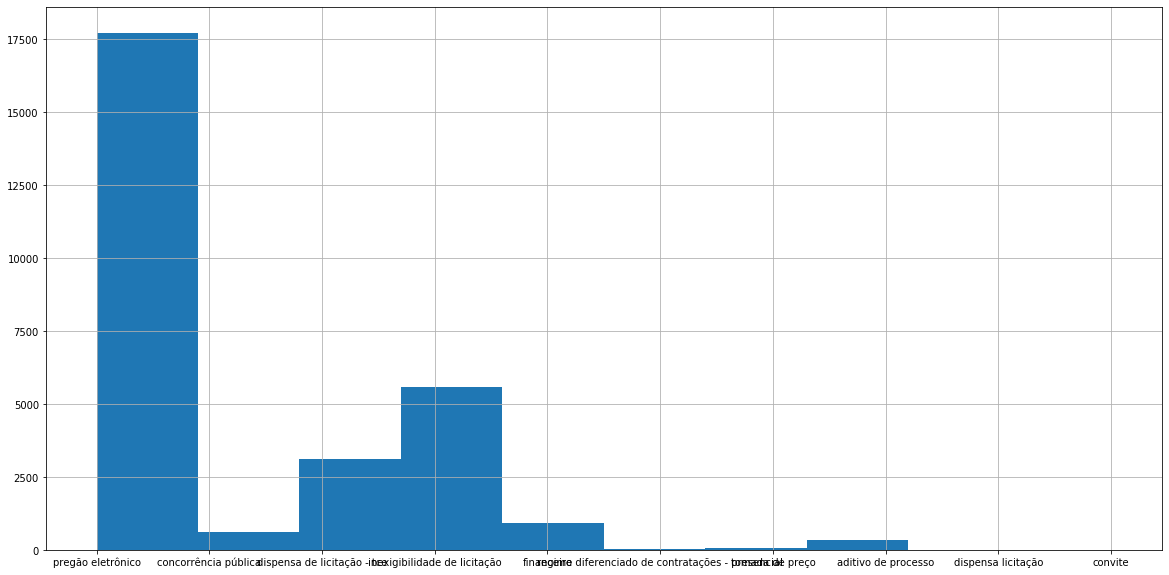

In [26]:
df_juncao['Modalidade'].hist()

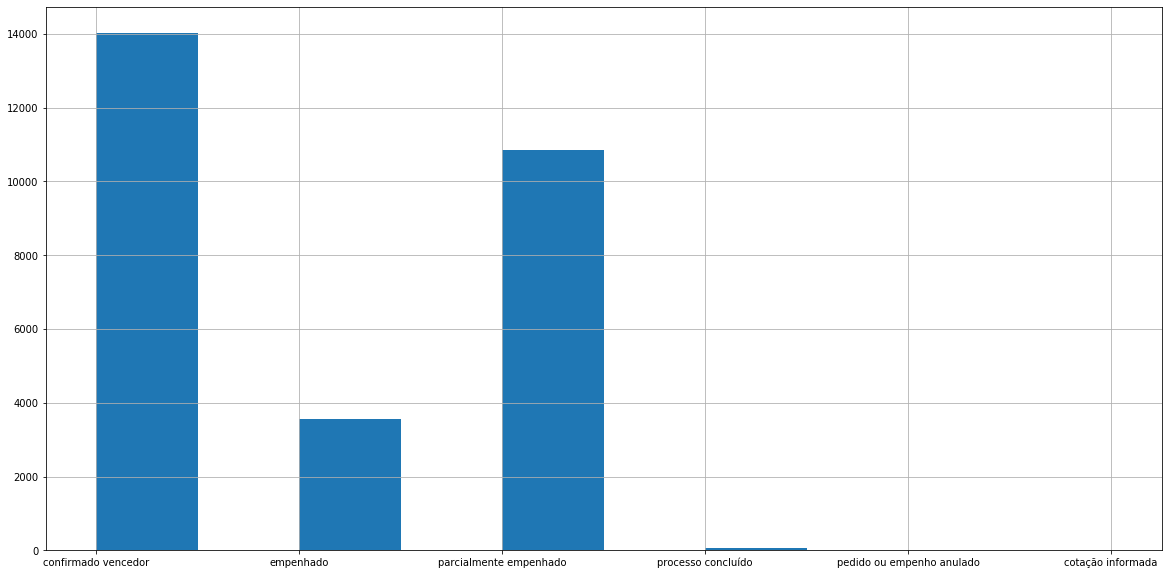

In [27]:
df_juncao['Situação'].hist()

#### 3.4 Análise de Modalidades com base na quantidade de licitações

In [28]:
df_by_modalidade = df_juncao.groupby(['Modalidade'])[['Modalidade']].size().reset_index(name = 'COUNT')

df_by_modalidade = df_by_modalidade.sort_values(by=['COUNT'], ascending=False)

df_by_modalidade

,Modalidade,COUNT
7,pregão eletrônico,17736
6,inexigibilidade de licitação,5586
3,dispensa de licitação - tce,3117
5,financeiro,948
1,concorrência pública,633
0,aditivo de processo,340
9,tomada de preço,62
8,regime diferenciado de contratações - presencial,49
2,convite,8
4,dispensa licitação,3


Para fins de simplificação, será feito um agrupamento dos tipo de Modalidades da seguinte forma:
* As Modalidades que possuem dispensa de licitação serão nomeadas como "sem licitação"
* As Top 3 Modalidades serão mantidas
* O restante das Modalidades serão nomeadas como "outros"

In [29]:
def check_licitacao(s):
    if s == 'dispensa de licitação - tce' or s == 'inexigibilidade de licitação' or s == 'dispensa licitação':
        return 'sem licitação'
    else:
        return s

df_juncao['Modalidade'] = df_juncao.apply(lambda x: check_licitacao(x.Modalidade), axis=1)
df_juncao['Modalidade'].unique()

array(['pregão eletrônico', 'concorrência pública', 'sem licitação',
       'financeiro', 'regime diferenciado de contratações - presencial',
       'tomada de preço', 'aditivo de processo', 'convite'], dtype=object)

In [30]:
def check_outros(s):
    #Top 3
    if s == 'pregão eletrônico' or s == 'sem licitação' or s == 'financeiro':
        return s
    else:
        return 'outros'

df_juncao['Modalidade'] = df_juncao.apply(lambda x: check_outros(x.Modalidade), axis=1)
df_juncao['Modalidade'].unique()

array(['pregão eletrônico', 'outros', 'sem licitação', 'financeiro'],
      dtype=object)

Com isto temos a seguinte distribuição de valores

In [31]:
df_by_modalidade = df_juncao.groupby(['Modalidade'])[['Modalidade']].size().reset_index(name = 'COUNT')

df_by_modalidade = df_by_modalidade.sort_values(by=['COUNT'], ascending=False)

df_by_modalidade

,Modalidade,COUNT
2,pregão eletrônico,17736
3,sem licitação,8706
1,outros,1092
0,financeiro,948


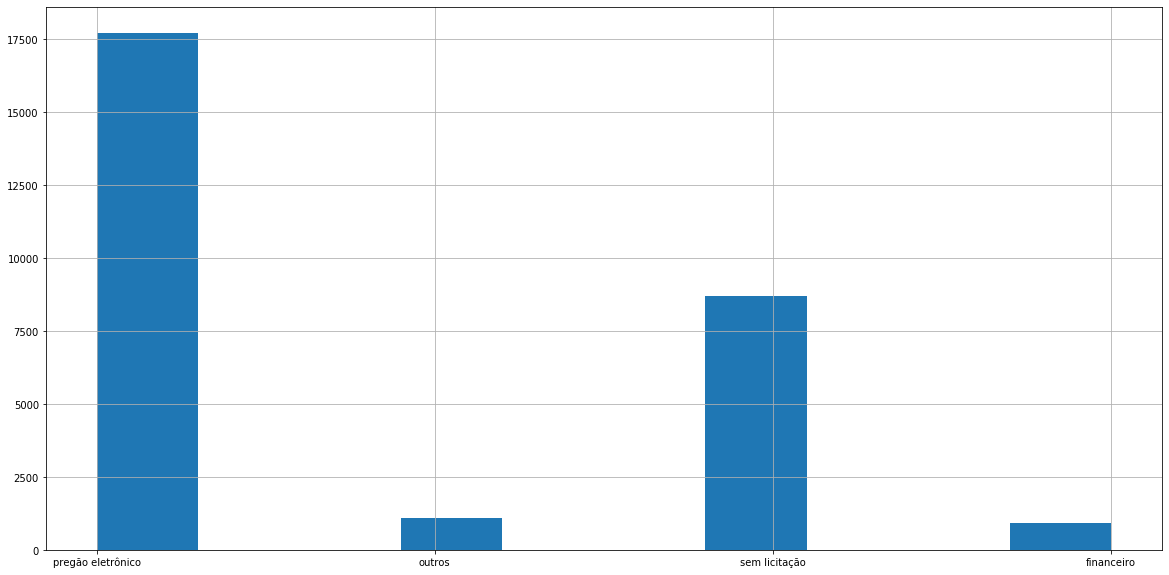

In [32]:
df_juncao['Modalidade'].hist()

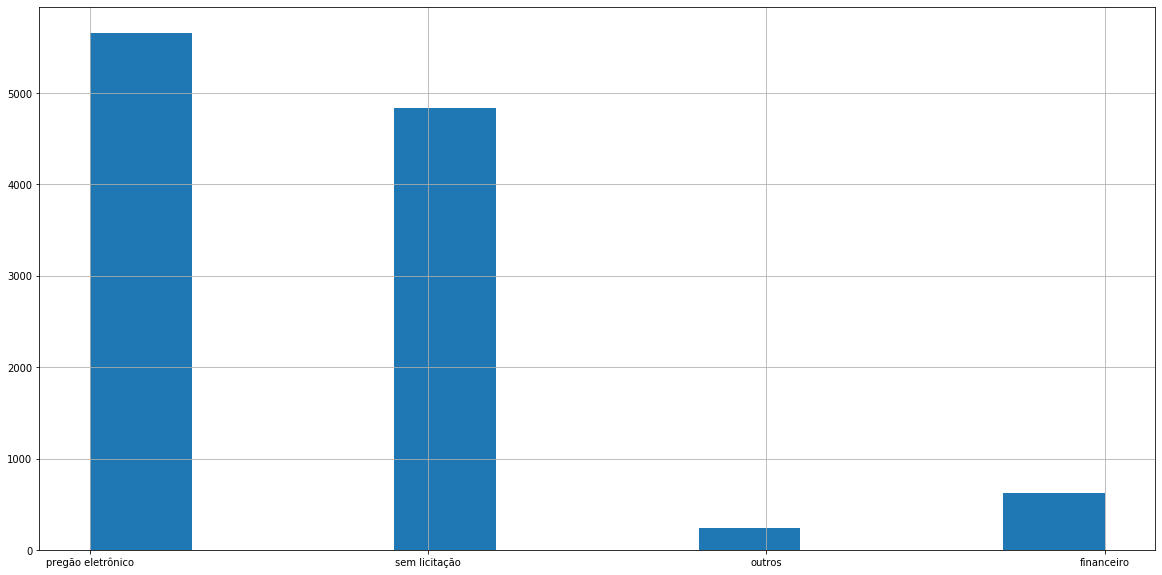

In [34]:
#Analise do mesmo histogram porém durante o periodo da pandemia
df_juncao['MES_ANO'] = df_juncao['Data Diário Oficial'].dt.to_period("M") 
df_juncao2 = df_juncao[df_juncao['MES_ANO'] >= '2019-12']

df_juncao2['Modalidade'].hist()

#### 3.5 Análise de Modalidades com base no valor de licitações

In [35]:
df_by_modalidade = df_juncao.groupby(['Modalidade']).agg([np.min, np.max, np.mean, np.std]).reset_index()

df_by_modalidade[['Modalidade', 'Valor Empenhado']]

Modalidade Valor Empenhado                                \
                                amin            amax          mean   
0         financeiro        0.200000  8389747.050000 156031.802637   
1             outros        0.560000 18138000.000000 500474.196273   
2  pregão eletrônico        0.110000  8800000.000000  39983.480705   
3      sem licitação        0.080000 25162705.600000 191821.904180   

                  
             std  
0  620556.938685  
1 1801442.551142  
2  228514.015704  
3  999833.539713

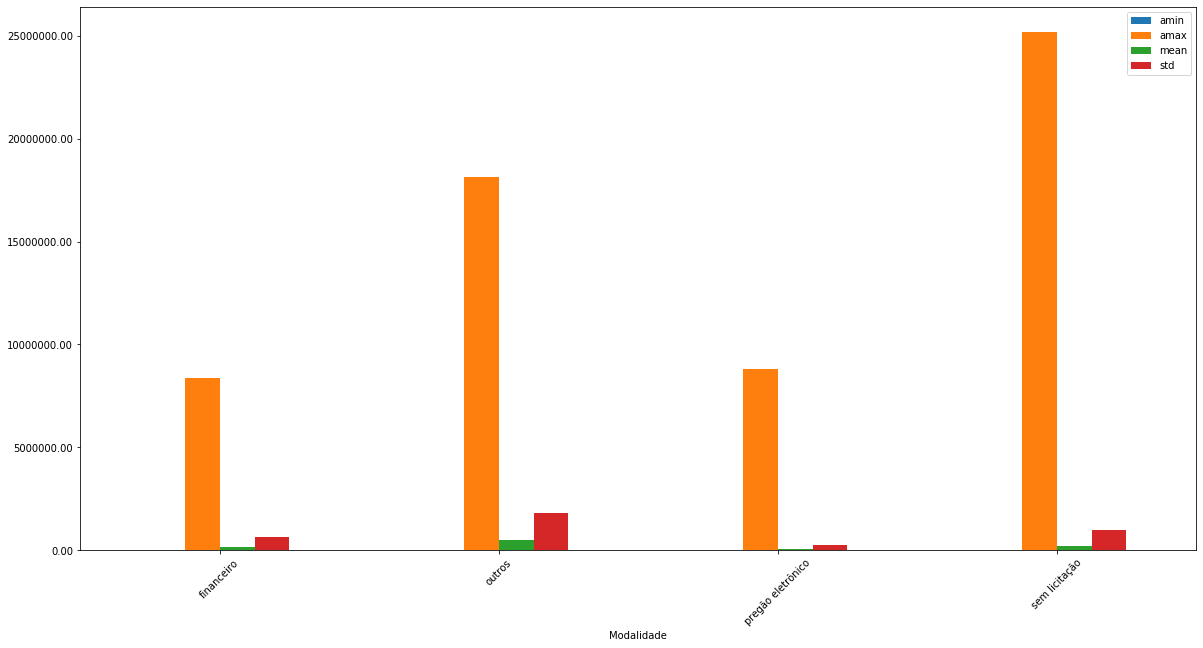

In [36]:
ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
df_by_modalidade.plot.bar(x='Modalidade', y='Valor Empenhado', ax=ax, rot=45)
plt.show()

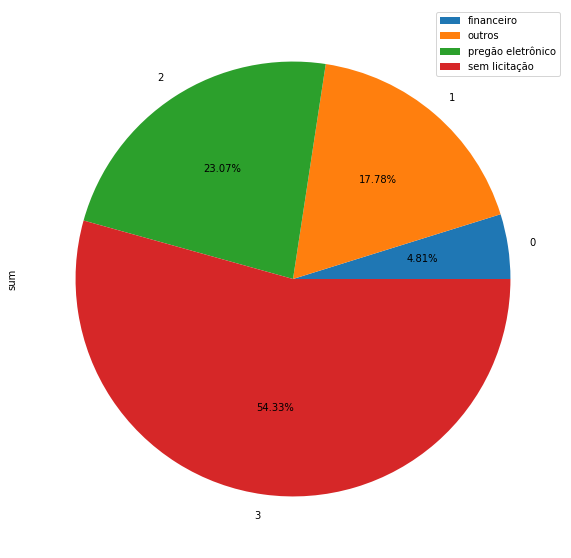

In [37]:
df_by_modalidade = df_juncao.groupby(['Modalidade']).agg([np.sum]).reset_index()

ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
df_by_modalidade.plot.pie(x='Modalidade', y='Valor Empenhado', ax=ax, autopct='%.2f%%')
#df_by_modalidade.plot.bar(x='Modalidade', y='Valor Empenhado', ax=ax)
ax.legend(['financeiro','outros' ,"pregão eletrônico", "sem licitação"])


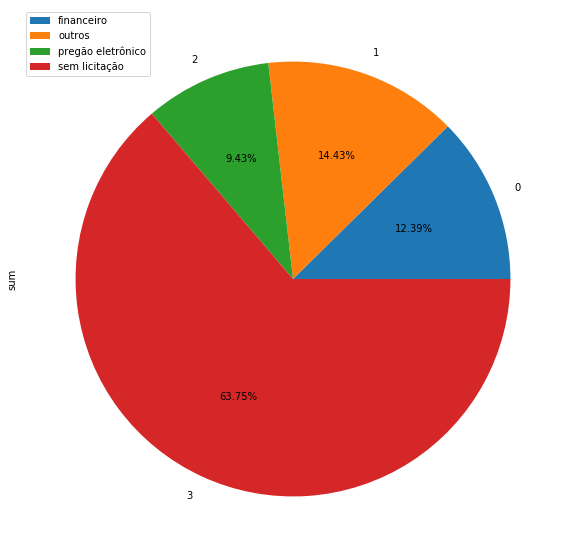

In [38]:
#Comparando o gasto por modalidade no periodo da pandemia
df_by_modalidade2 = df_juncao2.groupby(['Modalidade']).agg([np.sum]).reset_index()

ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
#df_by_modalidade2.plot.bar(x='Modalidade', y='Valor Empenhado', ax=ax, rot=45)
df_by_modalidade2.plot.pie(x='Modalidade', y='Valor Empenhado', ax=ax, autopct='%.2f%%')
ax.legend(['financeiro','outros' ,"pregão eletrônico", "sem licitação"])

#### 3.6 Análise temporal de Modalidades com base na quantidade de licitações

In [39]:
#Criando uma nova coluna que será usada para agrupamento por mes e ano
df_juncao['MES_ANO'] = df_juncao['Data Diário Oficial'].dt.to_period("M") 
#Agregação
df_juncao_by_month = df_juncao.groupby(['MES_ANO', 'Modalidade'])[['Modalidade']].size().reset_index(name = 'COUNT')
df_juncao_by_month = df_juncao_by_month.sort_values(by=['MES_ANO'], ascending=False)
df_juncao_by_month

,MES_ANO,Modalidade,COUNT
170,2020-12,sem licitação,136
169,2020-12,pregão eletrônico,87
168,2020-12,outros,8
167,2020-12,financeiro,12
166,2020-11,sem licitação,928
...,...,...,...
4,2016-05,pregão eletrônico,25
2,2016-04,pregão eletrônico,18
1,2016-04,outros,11
3,2016-04,sem licitação,4


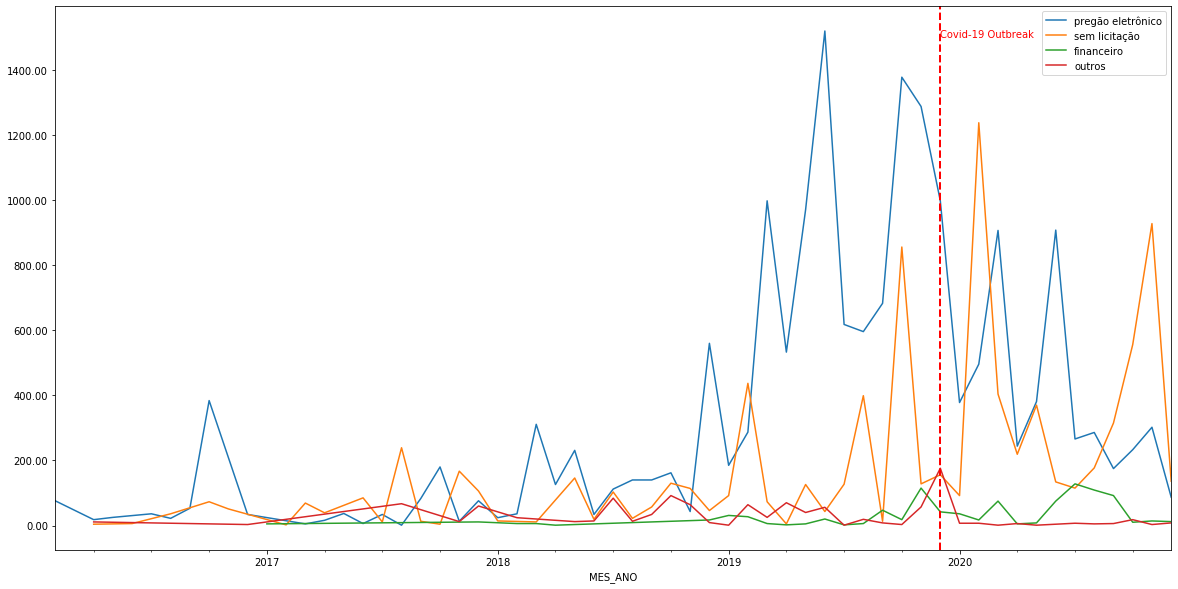

In [40]:
ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

df_juncao_by_month[df_juncao_by_month['Modalidade']=='pregão eletrônico'].plot(kind='line',x='MES_ANO',y='COUNT',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='sem licitação'].plot(kind='line',x='MES_ANO',y='COUNT',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='financeiro'].plot(kind='line',x='MES_ANO',y='COUNT',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='outros'].plot(kind='line',x='MES_ANO',y='COUNT',ax=ax)
ax.legend(["pregão eletrônico", "sem licitação", 'financeiro', 'outros'])

### Linha do tempo COVID-19 ref:https://coronavirus.saude.gov.br/linha-do-tempo
ax.axvline(pd.to_datetime('2019-12'), color='r', linestyle='--', lw=2)
ax.text(pd.to_datetime('2019-12'), y=1500, s='Covid-19 Outbreak', color='r')
plt.show()

#### 3.7 Análise temporal de Modalidades com base no valor de licitações

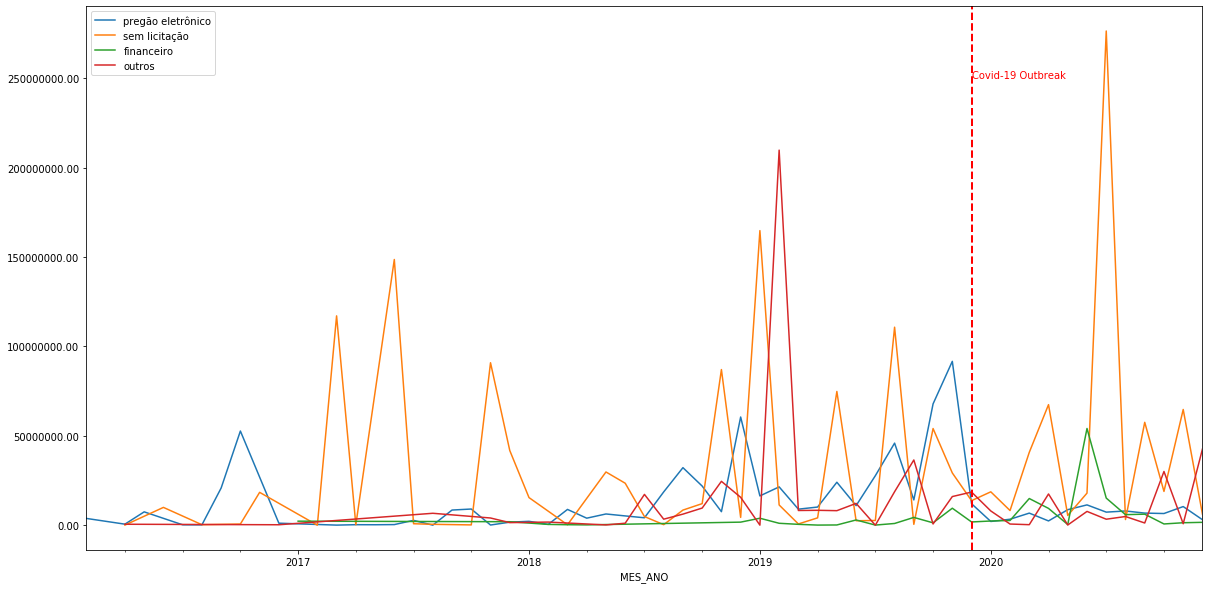

In [41]:
#Soma dos Valores Empenhados por mês para cada Modalidade

df_juncao_by_month = df_juncao.groupby(['MES_ANO', 'Modalidade']).agg([np.sum]).reset_index()
df_juncao_by_month = df_juncao_by_month.sort_values(by=['MES_ANO'], ascending=False)
df_juncao_by_month[['MES_ANO', 'Modalidade', 'Valor Empenhado']]


ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

df_juncao_by_month[df_juncao_by_month['Modalidade']=='pregão eletrônico'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='sem licitação'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='financeiro'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='outros'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
ax.legend(["pregão eletrônico", "sem licitação", 'financeiro', 'outros'])

### Linha do tempo COVID-19 ref:https://coronavirus.saude.gov.br/linha-do-tempo
ax.axvline(pd.to_datetime('2019-12'), color='r', linestyle='--', lw=2)
ax.text(pd.to_datetime('2019-12'), y=250000000, s='Covid-19 Outbreak', color='r')
plt.show()


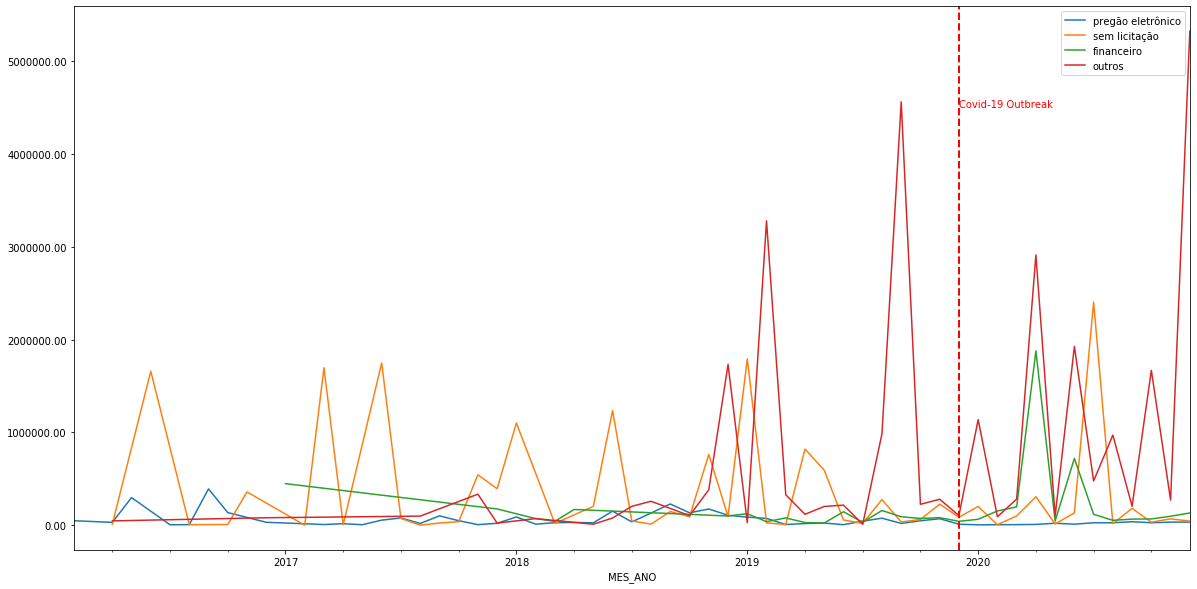

In [42]:
#Média dos Valores Empenhados por mês para cada Modalidade

df_juncao_by_month = df_juncao.groupby(['MES_ANO', 'Modalidade']).agg([np.mean]).reset_index()
df_juncao_by_month = df_juncao_by_month.sort_values(by=['MES_ANO'], ascending=False)
df_juncao_by_month[['MES_ANO', 'Modalidade', 'Valor Empenhado']]


ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

df_juncao_by_month[df_juncao_by_month['Modalidade']=='pregão eletrônico'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='sem licitação'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='financeiro'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['Modalidade']=='outros'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
ax.legend(["pregão eletrônico", "sem licitação", 'financeiro', 'outros'])

### Linha do tempo COVID-19 ref:https://coronavirus.saude.gov.br/linha-do-tempo
ax.axvline(pd.to_datetime('2019-12'), color='r', linestyle='--', lw=2)
ax.text(pd.to_datetime('2019-12'), y=4500000, s='Covid-19 Outbreak', color='r')
plt.show()

In [43]:
#Média dos Valores Empenhados por mês
df_juncao_by_month = df_juncao.groupby(['MES_ANO']).agg([np.mean, np.std]).reset_index()
df_juncao_by_month = df_juncao_by_month.sort_values(by=['MES_ANO'], ascending=False)

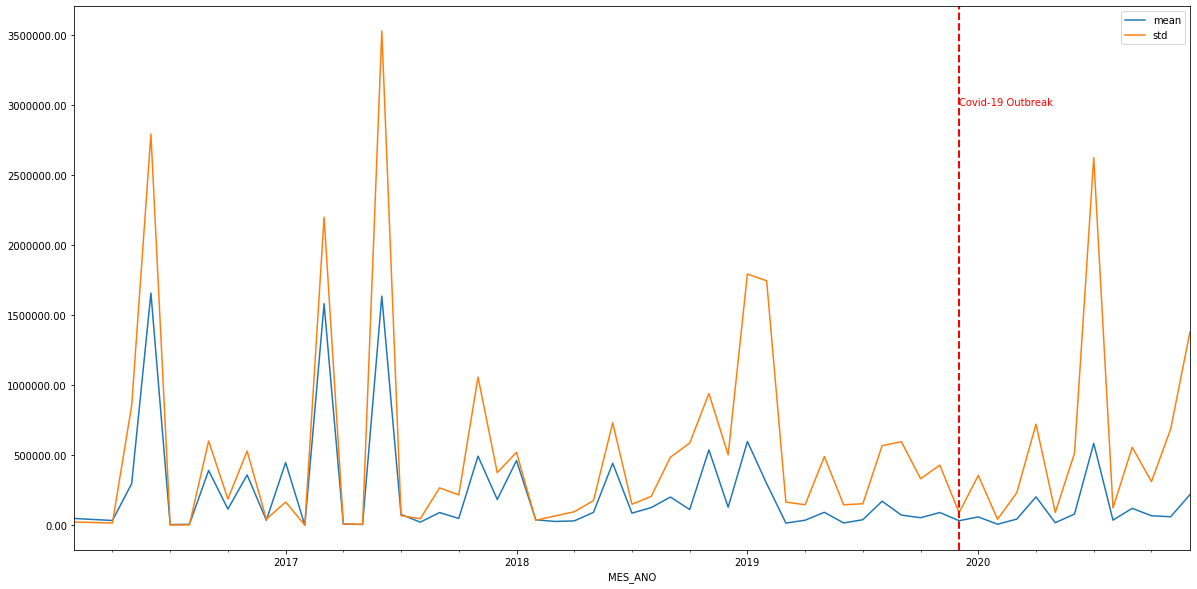

In [44]:
#### Evolução do total de gastos (média/desvio padrão) com todas as licitações
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

df_juncao_by_month.plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)

### Linha do tempo COVID-19 ref:https://coronavirus.saude.gov.br/linha-do-tempo
ax.axvline(pd.to_datetime('2019-12'), color='r', linestyle='--', lw=2)
ax.text(pd.to_datetime('2019-12'), y=3000000, s='Covid-19 Outbreak', color='r')

plt.show()

#### 3.8 Análise de outliers com base no valor de licitações

{'whiskers': [<matplotlib.lines.Line2D at 0x2947aceca08>,
 'caps': [<matplotlib.lines.Line2D at 0x2947acf29c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2947ace8f08>],
 'medians': [<matplotlib.lines.Line2D at 0x2947acf6948>],
 'fliers': [<matplotlib.lines.Line2D at 0x2947acf6fc8>],
 'means': []}

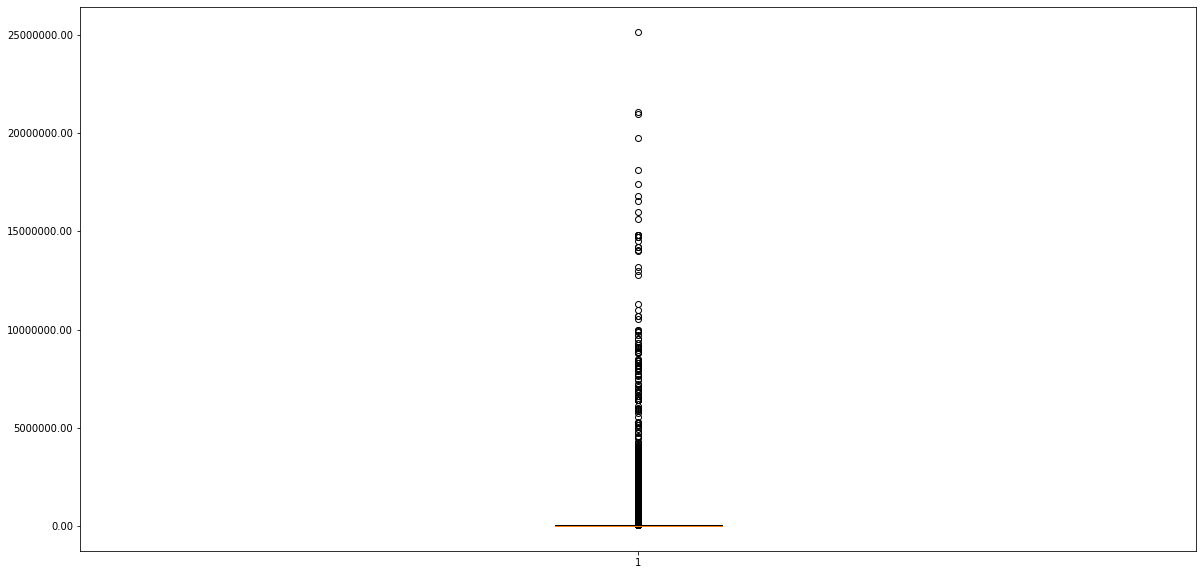

In [45]:
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

r = plt.boxplot(df_juncao['Valor Empenhado'])
r

{'whiskers': [<matplotlib.lines.Line2D at 0x2947b066b08>,
 'caps': [<matplotlib.lines.Line2D at 0x2947b069ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2947b066148>],
 'medians': [<matplotlib.lines.Line2D at 0x2947b06da48>],
 'fliers': [],
 'means': []}

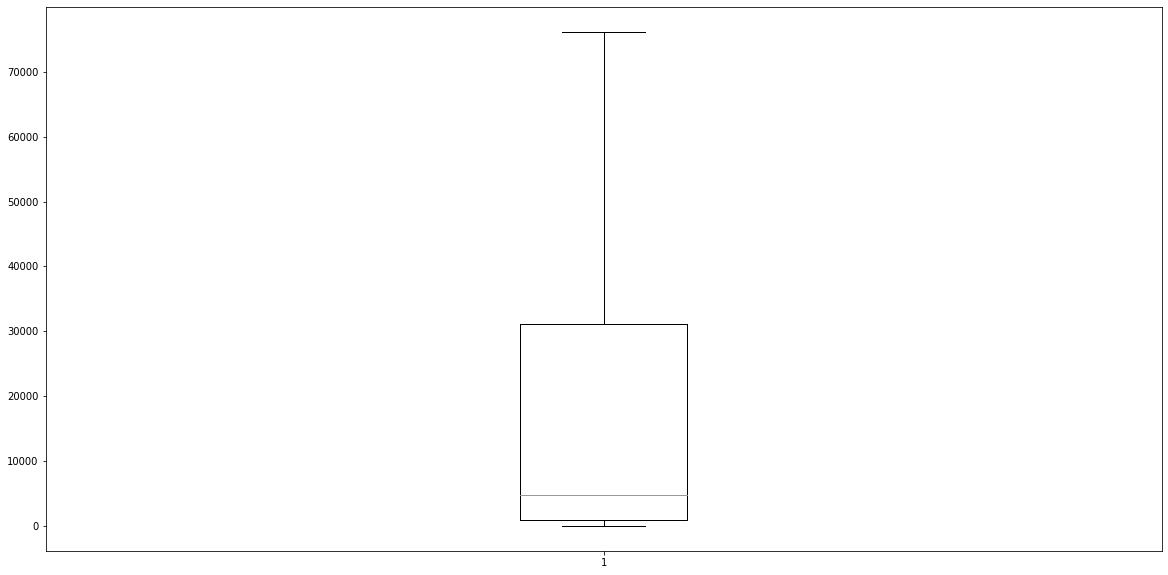

In [46]:
r = plt.boxplot(df_juncao['Valor Empenhado'], showfliers=False)
r

In [ ]:
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

df_juncao['Valor Empenhado'].plot.kde()

#### 3.9 Análise dos fornecedores com base na quantidade e valor de licitações

In [47]:
df_by_fornecedor = df_juncao.groupby(['Contratado/Fornecedor'])[['Contratado/Fornecedor']].size().reset_index(name = 'COUNT')

df_by_fornecedor = df_by_fornecedor.sort_values(by=['COUNT'], ascending=False)

df_by_fornecedor

,Contratado/Fornecedor,COUNT
2685,tornado comercio de alimentos e hortifrutigran...,472
1475,j. kaminski comércio de utilidades e serviços ...,395
764,cotrans locação de veículos ltda,358
2241,pontual servicos terceirizados ltda,330
433,bcl materiais de construção,321
...,...,...
1464,iury pietreski da silva,1
1458,isabella cristine de moura,1
1457,isabella cristina de azevedo e mello,1
1456,isabela sundin do lago de oliveira,1


In [48]:
df_by_fornecedor['Contratado/Fornecedor'].head(5)

2685    tornado comercio de alimentos e hortifrutigran...
1475    j. kaminski comércio de utilidades e serviços ...
764                      cotrans locação de veículos ltda
2241                  pontual servicos terceirizados ltda
433                           bcl materiais de construção
Name: Contratado/Fornecedor, dtype: object

TOP 5
TORNADO COMERCIO DE ALIMENTOS E HORTIFRUTIGRANJEIROS EIRELI            /   '00.254.197/0001' \
J. KAMINSKI COMÉRCIO DE UTILIDADES E SERVIÇOS ADMINISTRATIVOS LTDA.    /   '13.379.546/0001' \
COTRANS LOCAÇÃO DE VEÍCULOS LTDA                                       /   '77.637.684/0001' \
PONTUAL SERVICOS TERCEIRIZADOS LTDA                                    /   '14.983.004/0001' \
BCL MATERIAIS DE CONSTRUÇÃO                                            /   '24.716.057/0001'


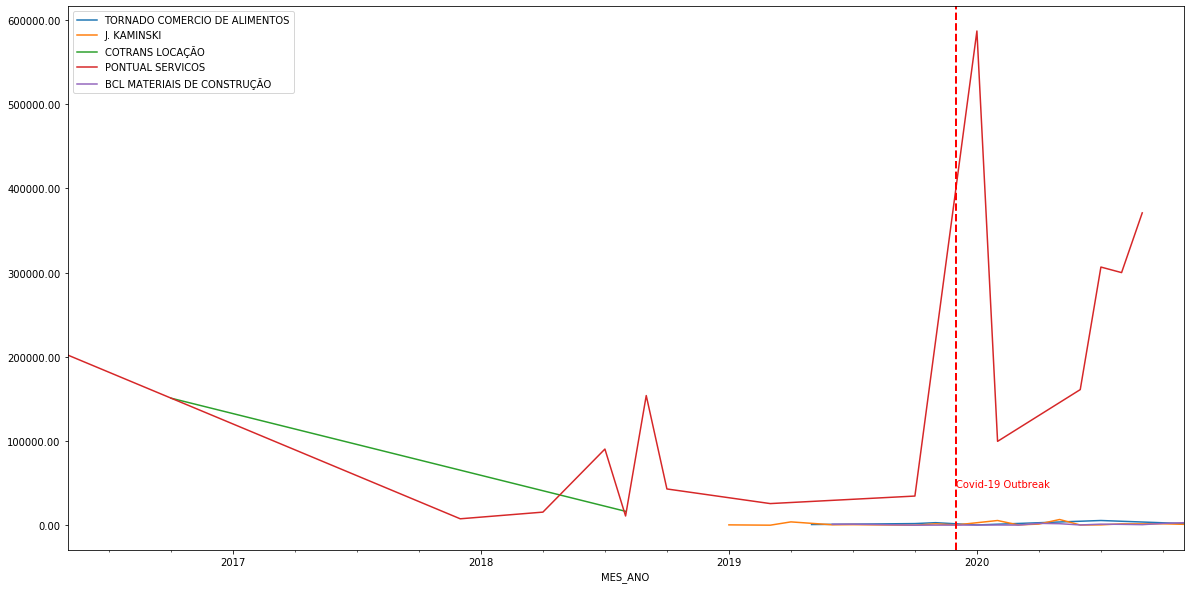

In [49]:
#Analise temporal da média de valor empenhado para os top 5 fornecedores

#Média dos Valores Empenhados por mês para cada Modalidade

df_juncao_by_month = df_juncao.groupby(['MES_ANO', 'CNPJ/CPF', 'Contratado/Fornecedor']).agg([np.mean]).reset_index()
df_juncao_by_month = df_juncao_by_month.sort_values(by=['MES_ANO'], ascending=False)
df_juncao_by_month[['MES_ANO', 'CNPJ/CPF', 'Contratado/Fornecedor', 'Valor Empenhado']]


ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='00.254.197/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='13.379.546/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='77.637.684/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='14.983.004/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='24.716.057/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
ax.legend(["TORNADO COMERCIO DE ALIMENTOS", "J. KAMINSKI", 'COTRANS LOCAÇÃO', 'PONTUAL SERVICOS', 'BCL MATERIAIS DE CONSTRUÇÃO'])

### Linha do tempo COVID-19 ref:https://coronavirus.saude.gov.br/linha-do-tempo
ax.axvline(pd.to_datetime('2019-12'), color='r', linestyle='--', lw=2)
ax.text(pd.to_datetime('2019-12'), y=45000, s='Covid-19 Outbreak', color='r')
plt.show()


Analise temporal da média de valor empenhado para os top 5 fornecedores com relação a Modalidade = sem licitação

In [50]:
#Média dos Valores Empenhados por mês 
df_juncao_sem_licitacao = df_juncao[df_juncao['Modalidade'] == 'sem licitação'].copy()
#df_juncao_by_month = df_juncao_by_month.sort_values(by=['MES_ANO'], ascending=False)
df_juncao_by_month = df_juncao_sem_licitacao.groupby(['MES_ANO', 'CNPJ/CPF', 'Contratado/Fornecedor']).agg([np.mean]).reset_index()

df_juncao_by_month = df_juncao_by_month[['MES_ANO', 'CNPJ/CPF', 'Contratado/Fornecedor', 'Valor Empenhado']]
df_juncao_by_month.columns = df_juncao_by_month.columns.droplevel(0)
df_juncao_by_month = df_juncao_by_month.sort_values(by=['mean'], ascending=False)
df_juncao_by_month.head(5)


,,,,mean
107,2018-10,76.545.011/0001,companhia de tecnologia da informação e comuni...,11000000.000000
20,2017-06,03.518.900/0001,instituto curitiba de saúde,9740000.000000
2555,2020-11,75.095.679/0002,hospital de clinicas da universidade federal d...,7753200.000000
1354,2020-07,14.814.139/0001,feas - fundação estatal de atenção à saude,5744808.647234
2554,2020-11,75.095.679/0001,universidade federal do paraná,5449500.000000


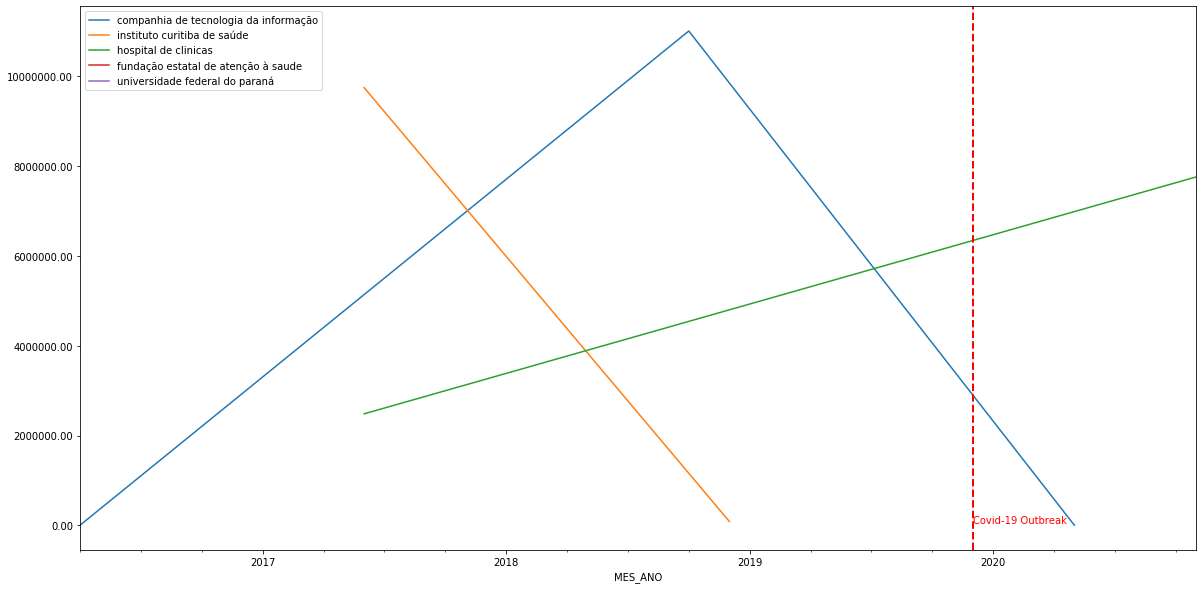

In [51]:
# TOP 5
ax = plt.gca() ### Não transformar numeros de ponto flutuante com a notação e+ em plots
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
df_juncao_by_month = df_juncao_sem_licitacao.groupby(['MES_ANO', 'CNPJ/CPF', 'Contratado/Fornecedor']).agg([np.mean]).reset_index()
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='76.545.011/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='03.518.900/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='75.095.679/0002'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='14.814.139/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
df_juncao_by_month[df_juncao_by_month['CNPJ/CPF']=='75.095.679/0001'].plot(kind='line',x='MES_ANO',y='Valor Empenhado',ax=ax)
ax.legend(["companhia de tecnologia da informação", "instituto curitiba de saúde", 'hospital de clinicas', 'fundação estatal de atenção à saude', 'universidade federal do paraná'])

### Linha do tempo COVID-19 ref:https://coronavirus.saude.gov.br/linha-do-tempo
ax.axvline(pd.to_datetime('2019-12'), color='r', linestyle='--', lw=2)
ax.text(pd.to_datetime('2019-12'), y=45000, s='Covid-19 Outbreak', color='r')
plt.show()

#### 3.11 Análise de similaridades e correlações

In [52]:
df_similaridades = pd.crosstab(df_juncao['Modalidade'], df_juncao['Situação'])
df_similaridades

Situação,confirmado vencedor,cotação informada,empenhado,parcialmente empenhado,pedido ou empenho anulado,processo concluído
Modalidade,,,,,,
financeiro,948,0,0,0,0,0
outros,1017,0,7,17,0,51
pregão eletrônico,4035,0,3067,10634,0,0
sem licitação,8032,1,475,197,1,0


In [53]:
df_similaridades.corr().style.background_gradient(cmap='RdBu')

Situação,confirmado vencedor,cotação informada,empenhado,parcialmente empenhado,pedido ou empenho anulado,processo concluído
Situação,,,,,,
confirmado vencedor,1.000000,0.902506,0.254292,0.121858,0.902506,-0.496937
cotação informada,0.902506,1.000000,-0.186953,-0.317425,1.000000,-0.333333
empenhado,0.254292,-0.186953,1.000000,0.990907,-0.186953,-0.399187
parcialmente empenhado,0.121858,-0.317425,0.990907,1.000000,-0.317425,-0.340143
pedido ou empenho anulado,0.902506,1.000000,-0.186953,-0.317425,1.000000,-0.333333
processo concluído,-0.496937,-0.333333,-0.399187,-0.340143,-0.333333,1.000000


---

title: Trabalho Definição de Dataset, Limpeza e Análise dos Dados

author: Melchiades Blanco Junior

date: Apr 25, 2021

---